<a href="https://colab.research.google.com/github/clacri/CASP14_MR_evaluation/blob/main/CASP_ReLLG_Exploration_Results_Refinement_Category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# First setting up steps

# Python imports
import os
import pandas as pd
#pd.show_versions()
from IPython.display import display
import numpy
from operator import itemgetter

# Google drive mounting to get the data
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')


# Plotting related
import matplotlib.pyplot as plt
plt.style.use(['/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/mydefplot.mplstyle','seaborn-whitegrid'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Second setting up step
# Locate the data in your drive
# In Claudia's case this category it is under /content/drive/MyDrive/DATA_FOR_NOTEBOOKS/Refinement_reLLG_tables
path_claudia_refinement_tables = "/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/Refinement_reLLG_tables/"
# There is also information about which structures do have x-ray data
path_data = "/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/targets_xray.csv"
# And which groups identifiers correspond with wich names
path_groups = "/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/groups.csv"


# More info about experimental data
path_csv_all_methods = "/content/drive/MyDrive/DATA_FOR_NOTEBOOKS/target_experiment_types.csv"

In [19]:
# Read in extra information

# About availability of x-ray data
df_data_xray = pd.read_csv(path_data, header=None)
df_data_xray.columns = ['Target']
list_xray_full = df_data_xray['Target'].tolist()
list_xray = [ele[1:] for ele in list_xray_full]
print('\nTargets with x-ray data',list_xray)
#display(df_data_xray)

# About availability of cryo-em data
# This info comes from the website https://predictioncenter.org/casp14/cryoem_results.cgi
# On that link there are multiple domains from the targets but I guess the target itself in full has the associated data
# Looking on the site, I found the cryoem targets are: H1036, T1026, T1036, T1092, T1093, T1094, T1095, T1096, T1099
# H1036 is a multimeric target but is the same structure that T1036, a cryoem structure with pdb id 6vn1
list_cryoem = ['1026', '1036', '1092', '1093', '1094', '1095', '1096', '1099']
print('\nTargets with CryoEM data',list_cryoem) 

# About the names of the groups
df_groups_key = pd.read_csv(path_groups,delimiter=';',dtype=str)
#display(df_groups_key)
df_groups_key.columns = ['Name_Group','Group','Type']
df_groups_key['Group'] = df_groups_key['Group'].astype(str)
del df_groups_key['Type']
#display(df_groups_key)
groupnames_dict = dict(zip(df_groups_key['Group'], df_groups_key['Name_Group']))
print("\nGroup names and numbers correspondence",groupnames_dict)

# Master csv with all experimental info now
df_global_methods= pd.read_csv(path_csv_all_methods,delimiter=',',dtype=str, header=None)
df_global_methods.columns = ['Target_Evaluation','Experimental_Method']
display(df_global_methods)

# Also list with all the targets to be able to use it to penalise groups who did not submit a target
list_target_evaluation = df_global_methods['Target_Evaluation'].tolist()
print("List target evaluation",list_target_evaluation)


Targets with x-ray data ['1024', '1030', '1031', '1033 ', '1035', '1037', '1039', '1040', '1041', '1042', '1042', '1043', '1032', '1034', '1038', '1046', '1048', '1049', '1050', '1052', '1053', '1054', '1056', '1058', '1064', '1065', '1067', '1070', '1073', '1074', '1079', '1080', '1082', '1083', '1084', '1085', '1086', '1087', '1089', '1090', '1091', '1100', '1101']

Targets with CryoEM data ['1026', '1036', '1092', '1093', '1094', '1095', '1096', '1099']

Group names and numbers correspondence {'000': 'VoroMQA-stout', '002': 'VoroMQA-dark', '003': 'SHORTLE', '004': 'GAPF_LNCC', '005': 'Seder2020', '006': 'BrainFold', '009': 'tFold_human', '010': 'TripletRes', '013': 'FEIG-S', '014': 'xianmingpan', '015': 'AP_1', '018': 'UNRES-template', '024': 'DeepPotential', '026': 'NOVA', '027': 'SSThread', '029': 'Venclovas', '031': 'Zhang-CEthreader', '032': 'MESHI', '033': 'ishidalab', '035': 'ModFOLDclust2', '039': 'ropius0QA', '042': 'QUARK', '044': 'DeepML', '050': 'IntFOLD6', '052': 'GAPF_

,Target_Evaluation,Experimental_Method
0,T1024-D1,X-ray
1,T1024-D2,X-ray
2,T1025-D1,X-ray
3,T1026-D1,Cryo-EM
4,T1027-D1,NMR
...,...,...
91,T1099-D1,Cryo-EM
92,T1100-D1,X-ray
93,T1100-D2,X-ray
94,T1101-D1,X-ray


List target evaluation ['T1024-D1', 'T1024-D2', 'T1025-D1', 'T1026-D1', 'T1027-D1', 'T1028-D1', 'T1029-D1', 'T1030-D1', 'T1030-D2', 'T1031-D1', 'T1032-D1', 'T1033-D1', 'T1034-D1', 'T1035-D1', 'T1036s1-D1', 'T1037-D1', 'T1038-D1', 'T1038-D2', 'T1039-D1', 'T1040-D1', 'T1041-D1', 'T1042-D1', 'T1043-D1', 'T1045s1-D1', 'T1045s2-D1', 'T1046s1-D1', 'T1046s2-D1', 'T1047s1-D1', 'T1047s2-D1', 'T1047s2-D2', 'T1047s2-D3', 'T1049-D1', 'T1050-D1', 'T1050-D2', 'T1050-D3', 'T1052-D1', 'T1052-D2', 'T1052-D3', 'T1053-D1', 'T1053-D2', 'T1054-D1', 'T1055-D1', 'T1056-D1', 'T1057-D1', 'T1058-D1', 'T1058-D2', 'T1060s2-D1', 'T1060s3-D1', 'T1061-D1', 'T1061-D2', 'T1061-D3', 'T1064-D1', 'T1065s1-D1', 'T1065s2-D1', 'T1067-D1', 'T1068-D1', 'T1070-D1', 'T1070-D2', 'T1070-D3', 'T1070-D4', 'T1073-D1', 'T1074-D1', 'T1076-D1', 'T1078-D1', 'T1079-D1', 'T1080-D1', 'T1082-D1', 'T1083-D1', 'T1084-D1', 'T1085-D1', 'T1085-D2', 'T1085-D3', 'T1086-D1', 'T1086-D2', 'T1087-D1', 'T1089-D1', 'T1090-D1', 'T1091-D1', 'T1091-D2', 'T

In [20]:
# Function definitions (to avoid code duplication)

def get_list_color_ref(indices_rank,skip_fac=1):
  list_colour=[]
  for groupi in indices_rank.index:
    if groupi== '---STARTING-MODEL---':
      list_colour.append('C0')
    else:
      list_colour.append('C'+str(skip_fac))
  return list_colour

def read_single_target_dataframe_and_prepare(path_table,treatment,metric,remove_not_considered_metric=True):
  df = pd.read_csv(path_table)
  # Prepare dataframe for analysis
  # Remove white spaces in titles
  df.rename(columns=str.strip, inplace=True)
  # Remove the .pdb extension
  df['Model'] = df['Model'].str.replace(r'.pdb', '')
  df['Model'] = df['Model'].str.strip()
  for column in list(df.columns):
    if column=="Model":
      continue
    # Drop the columns we are not interested in looking this time unless set to be kept
    if remove_not_considered_metric:
      if not column.endswith(treatment) or not column.startswith(metric):
        del df[column]
  # Include a column with the name of the group
  # Include a column with the name of the target
  # NOTE: I am sure there are better ways to do this. Also I will need to adapt to the different naming issues in Casp
  new = df["Model"].str.split("TS", n = 1, expand = True)
  # It seems in the refinement ones all the name is really before the TS. Not the same for prediction
  df["Target_Evaluation"] = new[0]
  df["Target"] = df["Target_Evaluation"].str[1:5]
  new = df["Model"].str.split("_", n = 1, expand = True)
  df['Self_rank'] = new[1].str.strip()
  new_group = new[0].str.split("TS",n = 1, expand = True)
  df["Group"]= new_group[1]
  return df.copy()
  
def process_target_dataframe(df, column_name):
    # For the mean and std calculations we need to ignore group TS999
    df_filtered = df[df.Group != '999' ]
    # but we will keep it somewhere else
    #df_reference = df[df.Group == '999' ]
    #display(df_filtered)
    #display(df_reference)
    # First do it for the as_rmsd option, compute mean and sd
    mean_val = df_filtered[column_name].mean() 
    #print("Mean value for ",column_name, " is ", mean_val)
    std_val = df_filtered[column_name].std()
    #print("Standard deviation value for ", column_name," is ", std_val)
    # Zscore 
    # The formula for calculating a z-score is is z = (x-μ)/σ
    # where x is the raw score, μ is the population mean, and σ is the population standard deviation. 
    # For the zscore we use the full one (includes group 999 but it was not used for mean and std)
    df[column_name+'_zscore'] = (df[column_name] - mean_val)/std_val
    # Remove all models with a value of this zscore worse than -2 
    size_before = len(df)
    df_filt_minus2 = df[df[column_name+'_zscore'] > -2] 
    size_after = len(df_filt_minus2)
    #print("\n SHERLOCK before")
    #display(df)
    if size_after < size_before:
      # Then I need to do a second round of computation with the filtered dataset
      # Now we will use the filtered one to recompute the mean, std, and of course zscore
      mean_val_filt = df_filt_minus2[column_name].mean() 
      #print("Mean value for ",column_name, " is ", mean_val)
      std_val_filt = df_filt_minus2[column_name].std()
      del df[column_name+'_zscore'] # we will remove it and regenerate it again after the filtering
      df[column_name+'_zscore'] = (df[column_name] - mean_val_filt)/std_val_filt
      #print("\n SHERLOCK after")
      #display(df)
    return df.copy(), mean_val, std_val

def process_all_targets(path_tables,treatment,metric,read_all=False):
  # We will need a larger dataframe that will be constructed by adding the processed ones for each target
  # so we will save the individual ones in a list
  list_dataframes = []
  # Now iterate over all the csv tables (each one is a target)
  for fichi in os.listdir(path_tables):
     if fichi.endswith('.csv'):
        #print("\n\n Processing table ",fichi)
        fullpathfichi = os.path.join(path_tables,fichi)
        # Read and processed csv
        if read_all:
          df_target = read_single_target_dataframe_and_prepare(fullpathfichi,treatment=treatment,metric=metric,remove_not_considered_metric=False)
          # Now compute for each column of the metric the first round of zscore, using mean and std
          for col in df_target.columns:
            if col.startswith('reLLG') and not col.endswith('zscore'):
              #print("\n Analysing ",col)
              df_target_with_zscores_first, mean_target, std_target = process_target_dataframe(df_target,col)
              list_dataframes.append(df_target_with_zscores_first)
     
        else:
          df_target = read_single_target_dataframe_and_prepare(fullpathfichi,treatment=treatment,metric=metric)
          # Now compute first round of zscore, using mean and std
          keyword_metric = metric+'_'+treatment
          df_target_with_zscores_first, mean_target, std_target = process_target_dataframe(df_target,keyword_metric)
          list_dataframes.append(df_target_with_zscores_first)
          # Check dataframe (now should also have the zscore column)
          #display(df_target)
          # NOTE: Maybe it is worth exploring how the values look like for a single target
          # But careful, too many figures might be hard on the memory
          #df_target.plot(y='reLLG_as_rmsd_zscore',kind='hist',title='reLLG_as_rmsd_zscore_'+fichi[:-16])

  # Concat will join them by their rows, and produce a single dataframe containing the results for all targets
  df_all_targets = pd.concat(list_dataframes,axis=0,ignore_index=True)
  return df_all_targets




### Analysis of the refinement category from CASP14 

As this is the refinement category, there is a starting model reference, which is the one represented by group 999, which will be scored but not considered for the computation of the mean and the standard deviation.

Groups submitting targets should use the B-factor column of the pdb to give the estimated error. However, as in past editions there have been groups either not submitting those estimations or putting something else, we have run calculations with three different assumptions: 1) that the b-factor column is an rmsd estimation, 2) that the b-factor column is indeed a b-factor, 3) setting the value to a constant, so that the same weight will be applied to all coordinates and to allow comparison of the improvement brought upon raw coordinates.

In [21]:
df_all_targets = process_all_targets(path_claudia_refinement_tables,treatment='as_rmsd',metric='reLLG')
# Add the extra information about groups name and availability of x-ray data
df_all_targets_merged = pd.merge(df_all_targets,df_groups_key,on="Group")
#display(df_all_targets)
#display(df_all_targets_merged)

df_all_targets_merged['Has_Exp_Data'] = df_all_targets_merged['Target'].isin(list_xray)

#print("Before removal")
#display(df_all_targets_merged[df_all_targets_merged['Group']=='003'])
#display(df_all_targets_merged)
# Remove problematic datapoints : R1074v2TS003_1, R1041v2TS003_1, R1067v1TS003_1
df_all_targets_merged = df_all_targets_merged[numpy.logical_not(df_all_targets_merged['Model'].isin(['R1074v2TS003_1','R1041v2TS003_1', 'R1067v1TS003_1']))]
# Table with all 
#print("After removal of those 3 datapoints")
display(df_all_targets_merged)
df_all = df_all_targets_merged

,Model,reLLG_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Exp_Data
0,R1052-D2TS003_1,0.001593,R1052-D2,1052,1,003,-1.370044,SHORTLE,True
1,R1052-D2TS003_2,0.000992,R1052-D2,1052,2,003,-1.452331,SHORTLE,True
2,R1091-D2TS003_1,0.005476,R1091-D2,1091,1,003,-0.742632,SHORTLE,True
3,R1030-D2TS003_1,0.002858,R1030-D2,1030,1,003,-0.308308,SHORTLE,True
4,R1085-D1TS003_1,0.000730,R1085-D1,1085,1,003,-0.322285,SHORTLE,True
...,...,...,...,...,...,...,...,...,...
5858,R1034x1TS080_4,0.020808,R1034x1,1034,4,080,-0.809443,FOLDYNE,True
5859,R1090TS080_1,0.001139,R1090,1090,1,080,-0.563404,FOLDYNE,True
5860,R1090TS080_2,0.001350,R1090,1090,2,080,-0.545211,FOLDYNE,True
5861,R1090TS080_3,0.001428,R1090,1090,3,080,-0.538416,FOLDYNE,True


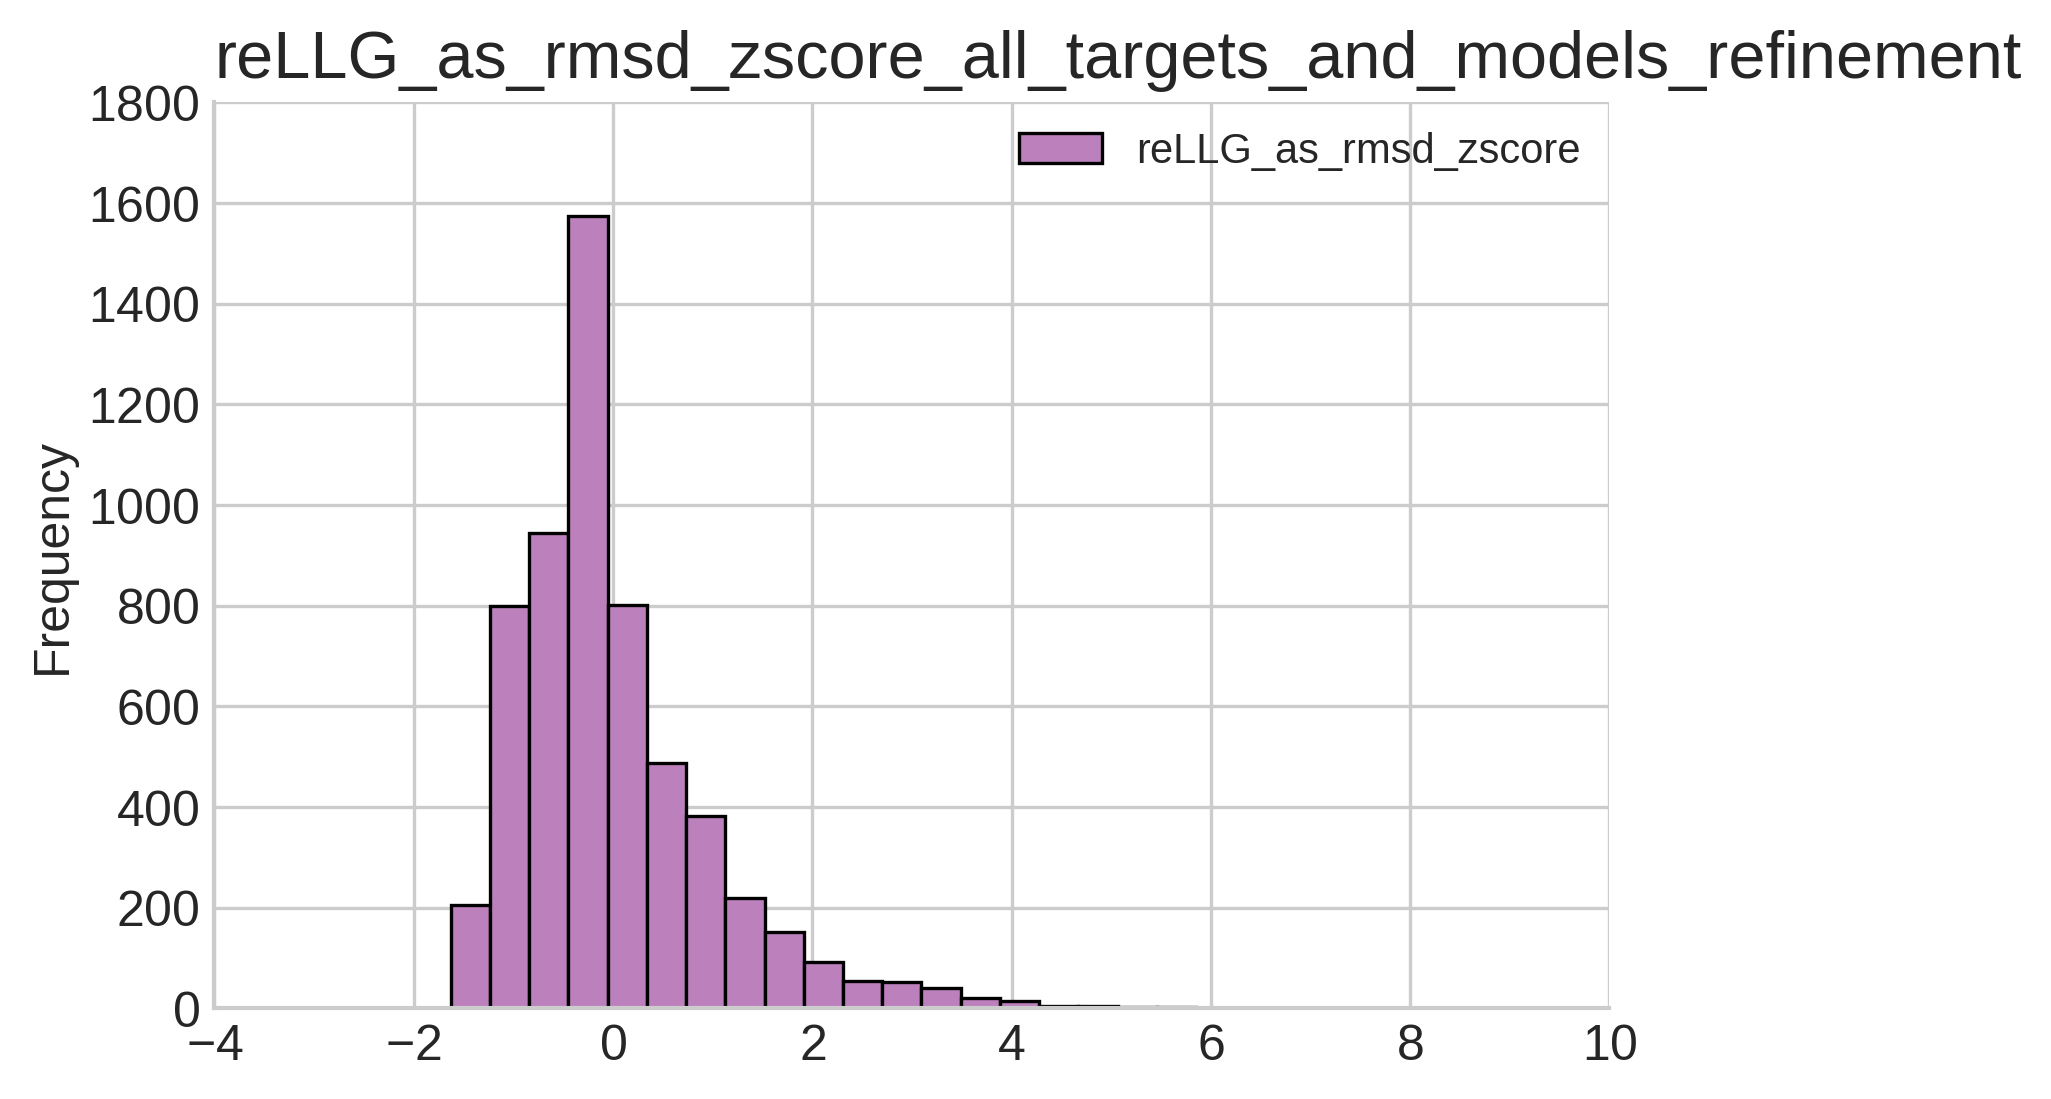

In [22]:
# Note this histogram has all single instances of pairs of targets/models for all groups
histogram_all_as_rmsd = df_all.plot(y='reLLG_as_rmsd_zscore',kind='hist',title='reLLG_as_rmsd_zscore_all_targets_and_models_refinement',bins=24)
histogram_all_as_rmsd.figure.savefig("reLLG_as_rmsd_zscore_all_targets_and_models_refinement.png")
# This will download it
#files.download("reLLG_as_rmsd_zscore_all_targets_and_models_refinement.png") 

In [23]:
# We will check if a given target and use this to filter further out
# First see how many unique targets
total_targets = len(df_all['Target_Evaluation'].unique())
print("Number of unique targets is ",total_targets)
total_groups = len(df_all['Name_Group'].unique())
print("Number of unique groups is ",total_groups)
print("Threshold for group consideration is ",(total_targets*2)/3)

Number of unique targets is  44
Number of unique groups is  37
Threshold for group consideration is  29.333333333333332


In [24]:
df_mod1 = df_all[df_all['Self_rank']== '1']
#display(df_mod1)
rank_models_evaluated = df_mod1.groupby(['Name_Group'])['Target_Evaluation'].count()
rank_models_evaluated.sort_values(inplace=True,ascending=False)
print(rank_models_evaluated)
print(len(rank_models_evaluated))
#rank_models_evaluated.plot.bar(figsize=(40,10))
groups_to_eliminate = rank_models_evaluated.loc[rank_models_evaluated<30]
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # This trick is to avoid the output data series to be truncated
list_to_eliminate = list(groups_to_eliminate.index)
print(list_to_eliminate)
print(len(list_to_eliminate))

Name_Group
---STARTING-MODEL---    44
MUFOLD                  44
BAKER-experimental      44
Bhattacharya            44
Bhattacharya-Server     44
AIR                     44
DeepMUSICS              44
DellaCorteLab           44
FEIG                    44
FEIG-S                  44
AILON                   44
UNRES-template          44
Kiharalab               44
Kiharalab_Refine        44
Protein-blacksmith      44
PerillaGroup            44
Risoluto                44
Pharmulator             44
BAKER                   44
AWSEM_PCA               43
UNRES                   42
SHORTLE                 41
Seminoles               41
Frustration_Refine      40
McGuffin                37
Seok                    37
Seok-server             37
Spider                  36
Beta                    34
PerezLab_Gators         33
GLoSA                   32
JLU_Comp_Struct_Bio     31
MULTICOM-CLUSTER        30
laufer_ros              26
Jones-UCL               19
CUTSP                    7
FOLDYNE          

In [25]:
# Analyse now the table in terms of the runs with the constant bfactor 
# Call to the function that will sequentially evaluate all the targets and join them in a single dataframe
df_all_targets_bfacconst = process_all_targets(path_claudia_refinement_tables,treatment='bfactor_constant',metric='reLLG')
#display(df_all_targets_bfacconst)
# Add the extra information about groups name and availability of x-ray data
df_all_targets_bfacconst_merged = pd.merge(df_all_targets_bfacconst,df_groups_key,on="Group")
df_all_targets_bfacconst_merged['Has_Exp_Data'] = df_all_targets_bfacconst_merged['Target'].isin(list_xray)
# remove the three problematic datapoints
df_all_targets_bfacconst_merged = df_all_targets_bfacconst_merged[numpy.logical_not(df_all_targets_bfacconst_merged['Model'].isin(['R1074v2TS003_1','R1041v2TS003_1', 'R1067v1TS003_1']))]

# Table with all the information
display(df_all_targets_bfacconst_merged)


,Model,reLLG_bfactor_constant,Target_Evaluation,Target,Self_rank,Group,reLLG_bfactor_constant_zscore,Name_Group,Has_Exp_Data
0,R1052-D2TS003_1,0.001595,R1052-D2,1052,1,003,-1.494775,SHORTLE,True
1,R1052-D2TS003_2,0.000995,R1052-D2,1052,2,003,-1.582580,SHORTLE,True
2,R1091-D2TS003_1,0.005532,R1091-D2,1091,1,003,-0.938597,SHORTLE,True
3,R1030-D2TS003_1,0.002881,R1030-D2,1030,1,003,-0.306076,SHORTLE,True
4,R1085-D1TS003_1,0.000730,R1085-D1,1085,1,003,-0.295463,SHORTLE,True
...,...,...,...,...,...,...,...,...,...
5858,R1034x1TS080_4,0.020808,R1034x1,1034,4,080,-1.096686,FOLDYNE,True
5859,R1090TS080_1,0.001135,R1090,1090,1,080,-0.615099,FOLDYNE,True
5860,R1090TS080_2,0.001350,R1090,1090,2,080,-0.580641,FOLDYNE,True
5861,R1090TS080_3,0.001428,R1090,1090,3,080,-0.567998,FOLDYNE,True


,Model,reLLG_as_rmsd,Target_Evaluation_x,Target_x,Self_rank_x,Group_x,reLLG_as_rmsd_zscore,Name_Group_x,Has_Exp_Data_x,reLLG_bfactor_constant,Target_Evaluation_y,Target_y,Self_rank_y,Group_y,reLLG_bfactor_constant_zscore,Name_Group_y,Has_Exp_Data_y
0,R1052-D2TS999_1,0.024729,R1052-D2,1052,1,999,1.801272,---STARTING-MODEL---,True,0.017614,R1052-D2,1052,1,999,0.847098,---STARTING-MODEL---,True
1,R1091-D2TS999_1,0.026603,R1091-D2,1091,1,999,-0.307927,---STARTING-MODEL---,True,0.026603,R1091-D2,1091,1,999,-0.161719,---STARTING-MODEL---,True
2,R1030-D2TS999_1,0.002921,R1030-D2,1030,1,999,-0.305977,---STARTING-MODEL---,True,0.002250,R1030-D2,1030,1,999,-0.359868,---STARTING-MODEL---,True
3,R1085-D1TS999_1,0.001571,R1085-D1,1085,1,999,-0.230166,---STARTING-MODEL---,True,0.001571,R1085-D1,1085,1,999,-0.193498,---STARTING-MODEL---,True
4,R1038-D2TS999_1,0.011608,R1038-D2,1038,1,999,0.001631,---STARTING-MODEL---,True,0.011609,R1038-D2,1038,1,999,0.645860,---STARTING-MODEL---,True
5,R1061-D3TS999_1,0.012975,R1061-D3,1061,1,999,-0.349682,---STARTING-MODEL---,False,0.012975,R1061-D3,1061,1,999,-0.279129,---STARTING-MODEL---,False
6,R1074v1TS999_1,0.203216,R1074v1,1074,1,999,2.854508,---STARTING-MODEL---,True,0.157017,R1074v1,1074,1,999,2.380122,---STARTING-MODEL---,True
7,R1055x1TS999_1,0.011174,R1055x1,1055,1,999,0.477476,---STARTING-MODEL---,False,0.009438,R1055x1,1055,1,999,0.384439,---STARTING-MODEL---,False
8,R1043v2TS999_1,0.106035,R1043v2,1043,1,999,2.874610,---STARTING-MODEL---,True,0.063248,R1043v2,1043,1,999,2.137175,---STARTING-MODEL---,True
9,R1065s2TS999_1,0.108626,R1065s2,1065,1,999,1.177273,---STARTING-MODEL---,True,0.059840,R1065s2,1065,1,999,0.439647,---STARTING-MODEL---,True


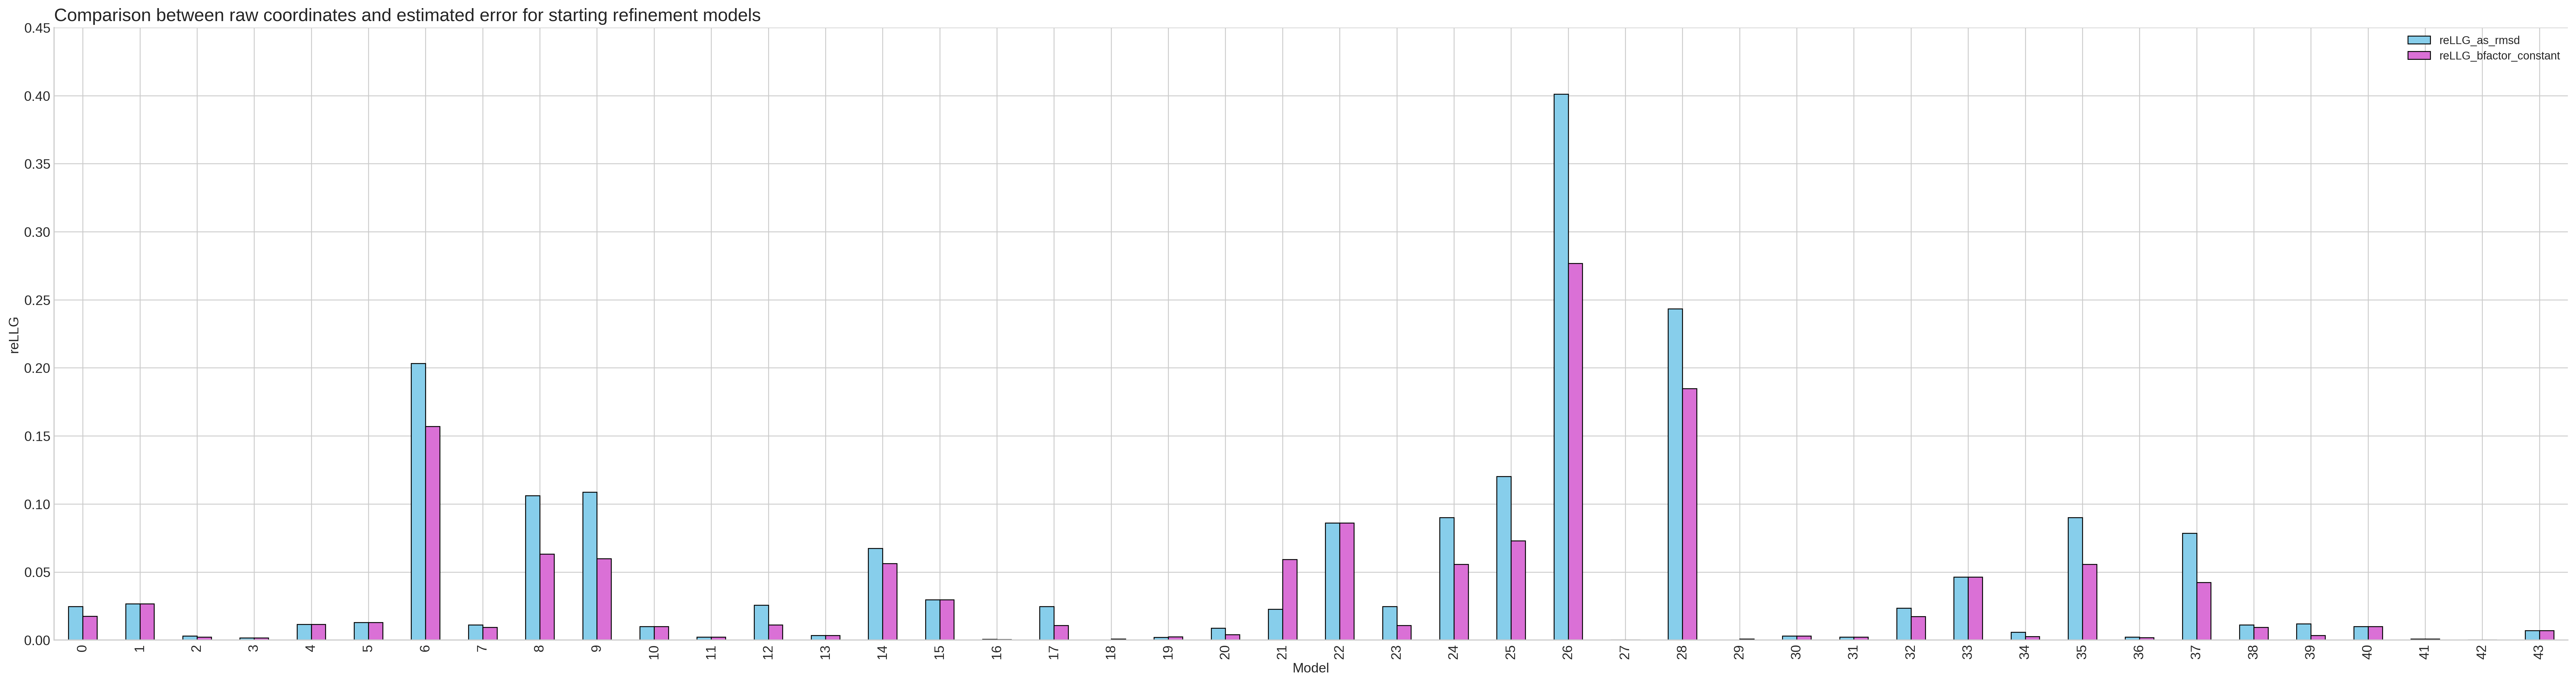

In [26]:
# We need to get the values for the starting template with the bfactor constant and without
# Most of the starting templates have their bfactor to 1 and hence at the end constant, but a few of them do not
starting_constant = df_all_targets_bfacconst_merged.loc[df_all_targets_bfacconst_merged['Group']=='999']
starting_as_rmsd = df_all.loc[df_all['Group']=='999']
#display(starting_constant)
#display(starting_as_rmsd)
merge_to_compare_forplot = pd.merge(starting_as_rmsd[['Model','reLLG_as_rmsd']],starting_constant[['Model','reLLG_bfactor_constant']],on="Model")
merge_to_compare = pd.merge(starting_as_rmsd,starting_constant,on="Model")
display(merge_to_compare)


ax = merge_to_compare_forplot.plot.bar(color=["SkyBlue","Orchid"], rot=0, title="Comparison between raw coordinates and estimated error for starting refinement models",figsize=(40,10))
ax.set_xlabel("Model")
ax.set_ylabel("reLLG")
plt.xticks(rotation=90)
#ax.figure.savefig("Comparison_between_raw_coordinates_and_estimated_error_prediction.png",figsize=(40,10),bbox_inches = "tight")
#files.download("Comparison_between_raw_coordinates_and_estimated_error_prediction.png") # This will download it
plt.show()

# As it can be observed there are values for which there are differences so I will need to use the bfactor constant ones always for this models.

SHERLOCK LEN MERGE TO COMPARE 44


,Model,reLLG_as_rmsd,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,Name_Group,Has_Exp_Data
0,R1052-D2TS003_1,0.001593,R1052-D2,1052,1,003,-1.370044,SHORTLE,True
2,R1091-D2TS003_1,0.005476,R1091-D2,1091,1,003,-0.742632,SHORTLE,True
3,R1030-D2TS003_1,0.002858,R1030-D2,1030,1,003,-0.308308,SHORTLE,True
4,R1085-D1TS003_1,0.000730,R1085-D1,1085,1,003,-0.322285,SHORTLE,True
5,R1038-D2TS003_1,0.000867,R1038-D2,1038,1,003,-0.916752,SHORTLE,True
...,...,...,...,...,...,...,...,...,...
39,R1031TS999_1,0.011942,R1031,1031,1,999,1.022381,---STARTING-MODEL---,True
40,R1056TS999_1,0.009923,R1056,1056,1,999,-0.163724,---STARTING-MODEL---,True
41,R1039TS999_1,0.000809,R1039,1039,1,999,-0.671220,---STARTING-MODEL---,True
42,R1029TS999_1,0.000324,R1029,1029,1,999,-0.213968,---STARTING-MODEL---,False




Below ranking using means over zscore of the metric
Name_Group
FEIG                    1.402466
FEIG-S                  1.363105
DellaCorteLab           1.217161
BAKER                   1.199190
BAKER-experimental      1.041615
Kiharalab_Refine        0.833955
---STARTING-MODEL---    0.697977
Kiharalab               0.567877
Seok-server             0.472416
Seok                    0.401853
PerillaGroup            0.309438
Bhattacharya-Server     0.234952
Seminoles               0.137330
Bhattacharya            0.031271
AIR                     0.022511
Spider                 -0.015407
MULTICOM-CLUSTER       -0.020788
DeepMUSICS             -0.035500
UNRES-template         -0.066399
McGuffin               -0.144802
UNRES                  -0.167002
Frustration_Refine     -0.184099
JLU_Comp_Struct_Bio    -0.221193
GLoSA                  -0.279953
SHORTLE                -0.463274
Protein-blacksmith     -0.616947
PerezLab_Gators        -0.619385
MUFOLD                 -0.868264
Pharmulator

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

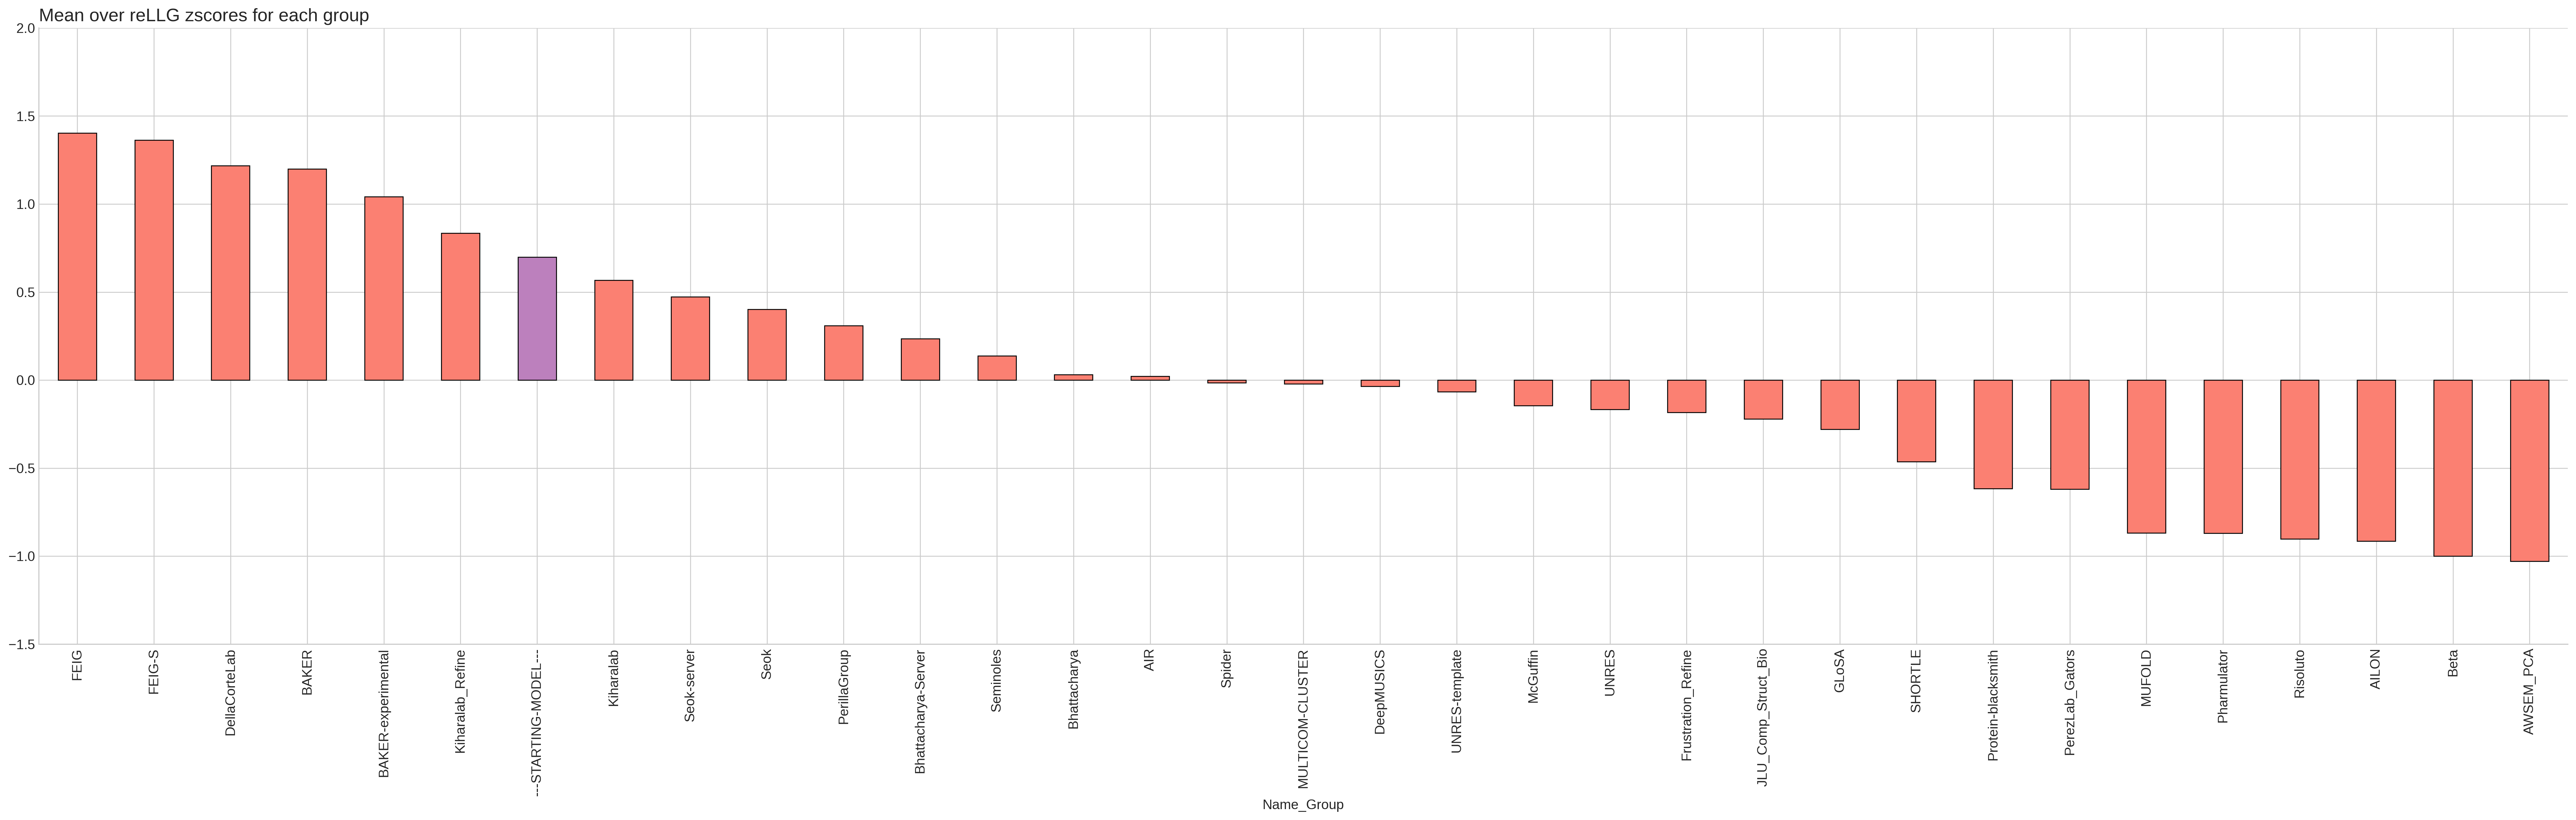

'\n# 1.2.3. Using median values\n# 1.2.3.1 On the raw score\nrank_model_1_as_rmsd_raw_median = df_mod1.groupby([\'Name_Group\'])[\'reLLG_as_rmsd\'].median()\nrank_model_1_as_rmsd_raw_median.sort_values(inplace=True,ascending=False)\nlist_colour=get_list_color_ref(rank_model_1_as_rmsd_raw_median)\nprint("\n\nBelow ranking using medians over raw value of the metric")\nprint(rank_model_1_as_rmsd_raw_median)\nplot_rank_model1_as_rmsd_raw_median = rank_model_1_as_rmsd_raw_median.plot.bar(color=list_colour,figsize=(40,10))\nplot_rank_model1_as_rmsd_raw_median.set_title(\'Median value of reLLG raw score for all groups\')\nplot_rank_model1_as_rmsd_raw_median.figure.savefig("refinement_plot_rank_model1_median_raw.png",figsize=(40,10),bbox_inches = "tight")\nfiles.download("refinement_plot_rank_model1_median_raw.png") # This will download it\nplt.show()\n\n# 1.2.3.2 On the zscore\nrank_model_1_as_rmsd_zscore_median = df_mod1.groupby([\'Name_Group\'])[\'reLLG_as_rmsd_zscore\'].median()\nrank_mode

In [27]:
# Now rank the groups
#df_mod1 = df_all[df_all['Self_rank']== '1'] # Already done in previous cell
#display(df_mod1)

# Before doing the ranking, make sure to eliminate those groups marked in list_to_eliminate
#display(df_mod1)
df_mod1 =  df_mod1.loc[~df_mod1['Name_Group'].isin(list_to_eliminate)]
#display(df_mod1)

#print('SHERLOCK LEN DFMOD1 BEFORE',len(df_mod1))
# Also, substitute the values of the starting models by those of the bfactor constant
# My idea, possibly not optimal
# First, remove all of those values from the as_rmsd 
#display(df_mod1)
df_mod1_noref =  df_mod1.loc[df_mod1['Group']!='999']
# Now, alter the dataframe from the previous cell and change the column names so that the reLLG_bfactor_constant is named like the as_rmsd
#display(merge_to_compare)
# Drop the duplicated columns with the y
merge_to_compare_1 = merge_to_compare.loc[:,~merge_to_compare.columns.str.endswith('y')]
merge_to_compare_2 = merge_to_compare_1.rename(columns={'Target_Evaluation_x':'Target_Evaluation','Target_x':'Target','Self_rank_x':'Self_rank','Group_x':'Group','Name_Group_x':'Name_Group','Has_Exp_Data_x':'Has_Exp_Data'},inplace=False)
merge_to_compare_3 = merge_to_compare_2.rename(columns = {'reLLG_bfactor_constant':'reLLG_as_rmsd','reLLG_bfactor_constant':'old_rellg_constant','reLLG_bfactor_constant_zscore':'reLLG_as_rmsd_zscore','reLLG_bfactor_constant_zscore':'old_rellg_constant_zscore'}, inplace = False)
merge_to_compare_3.drop(columns=['old_rellg_constant','old_rellg_constant_zscore'],inplace=True)
print('SHERLOCK LEN MERGE TO COMPARE',len(merge_to_compare_3))
# Then concatenate it with the as_rmsd before doing the rankings
full_merge = pd.concat([df_mod1_noref,merge_to_compare_3])
display(full_merge)
df_mod1 = full_merge # we want to do the rankings with this one

"""# 1.2.1. Using sum values
# 1.2.1.1 On the raw score
rank_model_1_as_rmsd_raw_sum = df_mod1.groupby(['Name_Group'])['reLLG_as_rmsd'].sum()
rank_model_1_as_rmsd_raw_sum.sort_values(inplace=True,ascending=False)
list_colour=get_list_color_ref(rank_model_1_as_rmsd_raw_sum)
print("\n\nBelow ranking using summatories over raw value of the metric")
print(rank_model_1_as_rmsd_raw_sum)
plot_rank_model1_as_rmsd_raw_sum = rank_model_1_as_rmsd_raw_sum.plot.bar(color=list_colour,figsize=(40,10))
plot_rank_model1_as_rmsd_raw_sum.set_title("Sum over reLLG raw score value for each group")
plot_rank_model1_as_rmsd_raw_sum.figure.savefig("refinement_plot_rank_model1_sum_raw.png",figsize=(40,10),bbox_inches = "tight")
files.download("refinement_plot_rank_model1_sum_raw.png") # This will download it
plt.show()

# 1.2.1.2 On the zscore
rank_model_1_as_rmsd_zscore_sum = df_mod1.groupby(['Name_Group'])['reLLG_as_rmsd_zscore'].sum()
rank_model_1_as_rmsd_zscore_sum.sort_values(inplace=True,ascending=False)
list_colour=get_list_color_ref(rank_model_1_as_rmsd_zscore_sum)
print("\n\nBelow ranking using summatories over zscore of the metric")
print(rank_model_1_as_rmsd_zscore_sum)
plot_rank_model1_as_rmsd_zscore_sum = rank_model_1_as_rmsd_zscore_sum.plot.bar(color=list_colour,figsize=(40,10))
plot_rank_model1_as_rmsd_zscore_sum.set_title("Sum over reLLG zscore values for each group")
plot_rank_model1_as_rmsd_zscore_sum.figure.savefig("refinement_plot_rank_model1_sum_zscore.png",figsize=(40,10),bbox_inches = "tight")
files.download("refinement_plot_rank_model1_sum_zscore.png") # This will download it
plt.show()

# 1.2.2. Using mean values
# 1.2.2.1 On the raw score
rank_model_1_as_rmsd_raw_mean = df_mod1.groupby(['Name_Group'])['reLLG_as_rmsd'].mean()
rank_model_1_as_rmsd_raw_mean.sort_values(inplace=True,ascending=False)
list_colour=get_list_color_ref(rank_model_1_as_rmsd_raw_mean)
print("\n\nBelow ranking using means over raw value of the metric")
print(rank_model_1_as_rmsd_raw_mean)
plot_rank_model1_as_rmsd_raw_mean = rank_model_1_as_rmsd_raw_mean.plot.bar(color=list_colour,figsize=(40,10))
plot_rank_model1_as_rmsd_raw_mean.set_title('Mean over reLLG raw score for each group')
plot_rank_model1_as_rmsd_raw_mean.figure.savefig("refinement_plot_rank_model1_mean_raw.png",figsize=(40,10),bbox_inches = "tight")
files.download("refinement_plot_rank_model1_mean_raw.png") # This will download it
plt.show()"""

# 1.2.2.2 On the zscore
rank_model_1_as_rmsd_zscore_mean = df_mod1.groupby(['Name_Group'])['reLLG_as_rmsd_zscore'].mean()
rank_model_1_as_rmsd_zscore_mean.sort_values(inplace=True,ascending=False)
list_colour=get_list_color_ref(rank_model_1_as_rmsd_zscore_mean)
print("\n\nBelow ranking using means over zscore of the metric")
print(rank_model_1_as_rmsd_zscore_mean)
plt.rcParams.update({'font.size': 22}) # must set in top
plot_rank_model1_as_rmsd_zscore_mean = rank_model_1_as_rmsd_zscore_mean.plot.bar(color=list_colour,figsize=(40,10))
plot_rank_model1_as_rmsd_zscore_mean.set_title("Mean over reLLG zscores for each group")
plot_rank_model1_as_rmsd_zscore_mean.figure.savefig("refinement_plot_rank_model1_mean_zscore.png",figsize=(40,10),bbox_inches = "tight")
files.download("refinement_plot_rank_model1_mean_zscore.png") # This will download it
plt.show()

"""
# 1.2.3. Using median values
# 1.2.3.1 On the raw score
rank_model_1_as_rmsd_raw_median = df_mod1.groupby(['Name_Group'])['reLLG_as_rmsd'].median()
rank_model_1_as_rmsd_raw_median.sort_values(inplace=True,ascending=False)
list_colour=get_list_color_ref(rank_model_1_as_rmsd_raw_median)
print("\n\nBelow ranking using medians over raw value of the metric")
print(rank_model_1_as_rmsd_raw_median)
plot_rank_model1_as_rmsd_raw_median = rank_model_1_as_rmsd_raw_median.plot.bar(color=list_colour,figsize=(40,10))
plot_rank_model1_as_rmsd_raw_median.set_title('Median value of reLLG raw score for all groups')
plot_rank_model1_as_rmsd_raw_median.figure.savefig("refinement_plot_rank_model1_median_raw.png",figsize=(40,10),bbox_inches = "tight")
files.download("refinement_plot_rank_model1_median_raw.png") # This will download it
plt.show()

# 1.2.3.2 On the zscore
rank_model_1_as_rmsd_zscore_median = df_mod1.groupby(['Name_Group'])['reLLG_as_rmsd_zscore'].median()
rank_model_1_as_rmsd_zscore_median.sort_values(inplace=True,ascending=False)
list_colour=get_list_color_ref(rank_model_1_as_rmsd_zscore_median)
print("\n\nBelow ranking using medians over zscore of the metric")
print(rank_model_1_as_rmsd_zscore_median)
plot_rank_model1_as_rmsd_zscore_median = rank_model_1_as_rmsd_zscore_median.plot.bar(color=list_colour,figsize=(40,10))
plot_rank_model1_as_rmsd_zscore_median.set_title("Median over reLLG zscore values for each group")
plot_rank_model1_as_rmsd_zscore_median.figure.savefig("refinement_plot_rank_model1_median_zscore.png",figsize=(40,10),bbox_inches = "tight")
files.download("refinement_plot_rank_model1_median_zscore.png") # This will download it
plt.show()
"""



Checking maximum value for group  AILON


Checking maximum value for group  AIR


Checking maximum value for group  AWSEM_PCA


Checking maximum value for group  BAKER


Checking maximum value for group  BAKER-experimental


Checking maximum value for group  Beta


Checking maximum value for group  Bhattacharya


Checking maximum value for group  Bhattacharya-Server


Checking maximum value for group  CUTSP


Checking maximum value for group  DeepMUSICS


Checking maximum value for group  DellaCorteLab


Checking maximum value for group  FEIG


Checking maximum value for group  FEIG-S


Checking maximum value for group  FOLDYNE


Checking maximum value for group  Frustration_Refine


Checking maximum value for group  GLoSA


Checking maximum value for group  JLU_Comp_Struct_Bio


Checking maximum value for group  Jones-UCL


Checking maximum value for group  Kiharalab


Checking maximum value for group  Kiharalab_Refine


Checking maximum value for group  MUFOLD


Checking maximum va

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

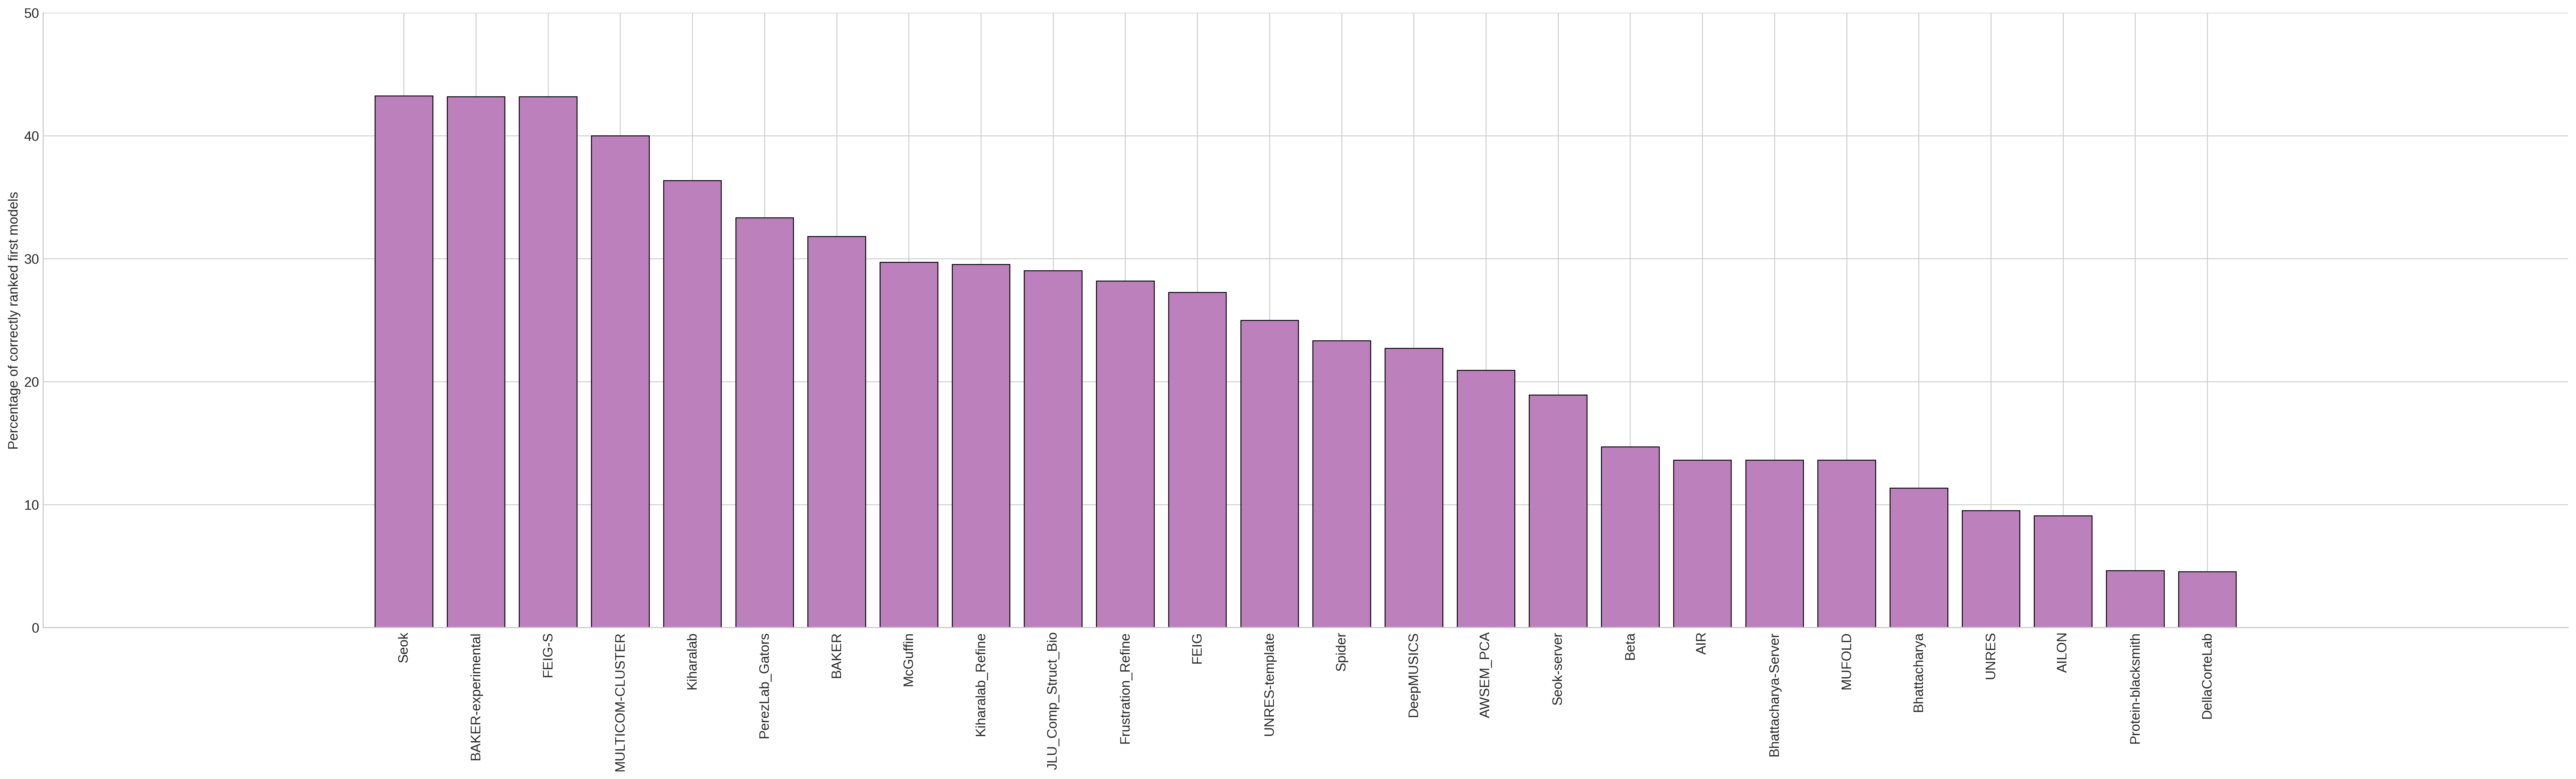

In [28]:
# 1.3 Can we see if they got their own ranking right?
# Can we see if they got their own ranking right?
# That is, which fraction of their targets were actually right in pointing out model 1 was the best
dict_self_rank_correct = {} 
# For this we use the full but remove the starting model
df_models = df_all.loc[df_all['Group']!='999']
#display(df_models)
by_groups = df_models.groupby(['Name_Group'])
for group in by_groups:
  print("\n\nChecking maximum value for group ",group[0])
  if group[0] in groups_to_eliminate:
    #rint("Skipping this one because in groups_to_eliminate")
    continue # we will skip the groups that will not be ranked
  # In each entry we will save in a list 1 per each time their model 1 was actually the best for a given target and 0 when not
  dict_self_rank_correct[group[0]] = []
  # I can iterate now by each target for this group and see their 5 models
  by_target = group[1].groupby('Target_Evaluation')
  for targeti in by_target:
    #print('\n\n',targeti)
    #print('sherlock len models' ,len(targeti[1]))
    if len(targeti[1])==5:
        # Now get the best score for all their models for that target
        #print('maximum is ',targeti[1]['reLLG_as_rmsd_zscore'].max())
        index_max = targeti[1]['reLLG_as_rmsd_zscore'].idxmax()
        #print(targeti[1].loc[index_max]['Self_rank'])
        if targeti[1].loc[index_max]['Self_rank'] == '1':
            dict_self_rank_correct[group[0]].append(1)
        else:
            dict_self_rank_correct[group[0]].append(0)
    else: 
        # You skip this target because it did not have 5 models
        continue


print("SHERLOCK check the dict keys",dict_self_rank_correct.keys())  

print("SHERLOCK check the dictLEN keys",len(dict_self_rank_correct.keys())  )

rank_list = []
for keygroup in dict_self_rank_correct.keys():
  #print("SHERLOCK dict_self_rank_correct[keygroup]",dict_self_rank_correct[keygroup])
  #print("SHERLOCK len(dict_self_rank_correct[keygroup])",len(dict_self_rank_correct[keygroup]))
  total = len(dict_self_rank_correct[keygroup])
  if total > 0:
      positives = dict_self_rank_correct[keygroup].count(1) # how many times was the first
      percentage = (positives * 100) / total
      print('\nGroup ',keygroup,' had ',positives,' out of ',total,' targets with 5 models correctly ranked as first, giving a % of ',percentage)
      rank_list.append((keygroup,percentage))
  else:
    continue

sorted_rank_list = sorted(rank_list,key=lambda x: x[1], reverse=True)
for ele in sorted_rank_list:
  print(ele)

# Now do the plot
labels, ys = zip(*sorted_rank_list)
xs = numpy.arange(len(labels)) 
#width = 1.5
plt.figure(figsize=(40,10))
plt.bar(xs, ys)
plt.xticks(xs, labels, rotation=90) 
plt.ylabel("Percentage of correctly ranked first models")
plt.savefig("Self_ranking_assesment_refinement.png",figsize=(40,10),bbox_inches = "tight")
files.download("Self_ranking_assesment_refinement.png") # This will download it
plt.show()

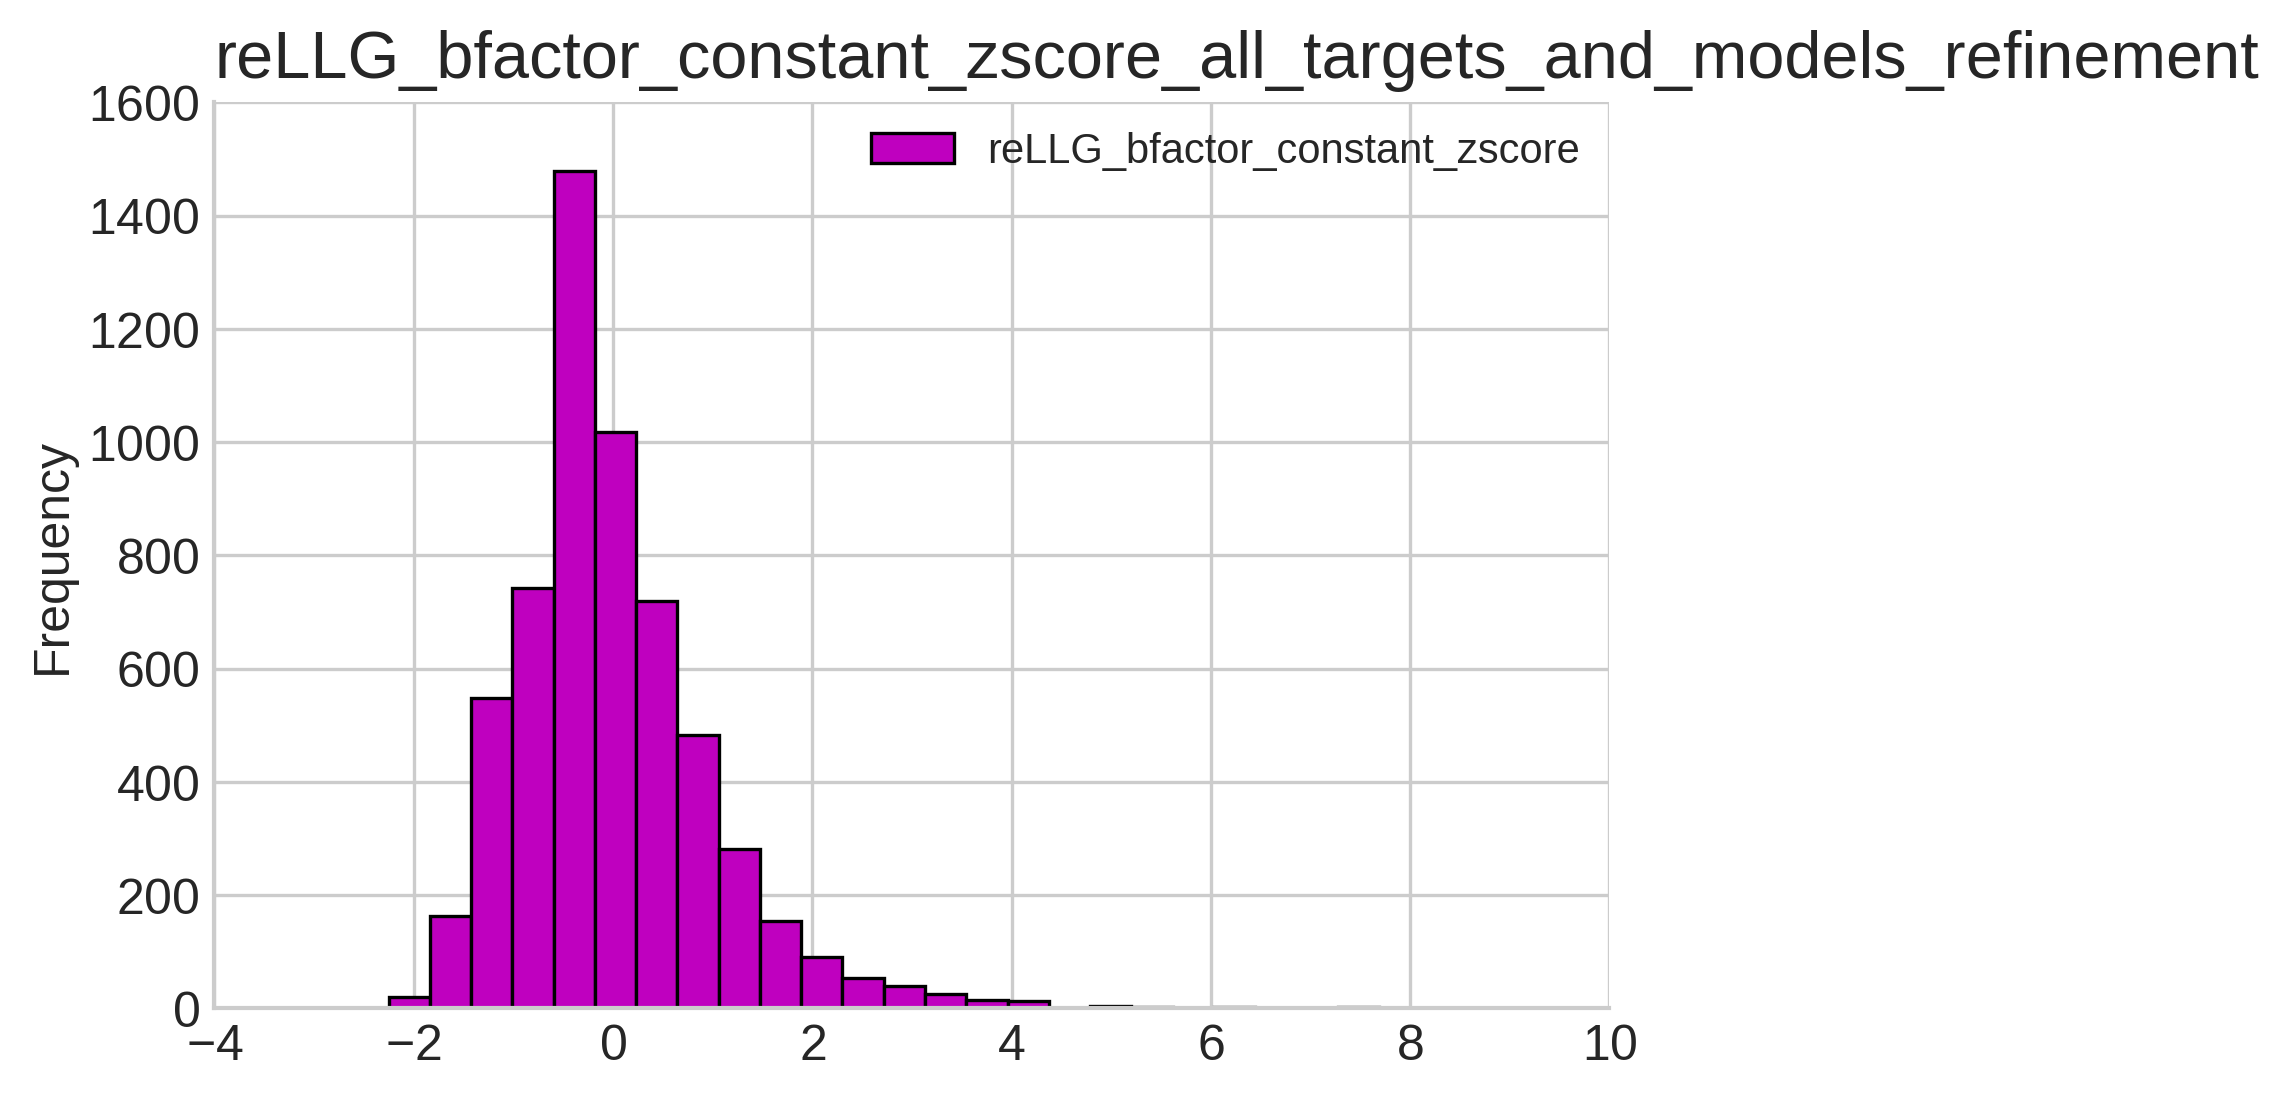

In [29]:
histogram_all_as_bfactor_constant = df_all_targets_bfacconst_merged.plot(y='reLLG_bfactor_constant_zscore',kind='hist',title='reLLG_bfactor_constant_zscore_all_targets_and_models_refinement',bins=24,color='m')
histogram_all_as_bfactor_constant.figure.savefig("reLLG_bfactor_constant_zscore_all_targets_and_models_refinement.png")
# This will download it
#files.download("reLLG_bfactor_constant_zscore_all_targets_and_models_refinement.png") 

### Experiment 3: column as bfactors

Considers that the values given in the bfactor column are actually bfactors and not error estimations.

In [30]:
# Call to the function that will sequentially evaluate all the targets and join them in a single dataframe
df_all_as_bfac = process_all_targets(path_claudia_refinement_tables,treatment='as_bfactor',metric='reLLG')
# Add the extra information about groups name and availability of x-ray data
df_all_as_bfac_merged = pd.merge(df_all_as_bfac,df_groups_key,on="Group")
df_all_as_bfac_merged['Has_Exp_Data'] = df_all_as_bfac_merged['Target'].isin(list_xray)
# remove the three problematic datapoints
df_all_as_bfac_merged = df_all_as_bfac_merged[numpy.logical_not(df_all_as_bfac_merged['Model'].isin(['R1074v2TS003_1','R1041v2TS003_1', 'R1067v1TS003_1']))]

# Table with all the information
display(df_all_as_bfac_merged)


,Model,reLLG_as_bfactor,Target_Evaluation,Target,Self_rank,Group,reLLG_as_bfactor_zscore,Name_Group,Has_Exp_Data
0,R1052-D2TS003_1,0.001594,R1052-D2,1052,1,003,-1.580205,SHORTLE,True
1,R1052-D2TS003_2,0.000996,R1052-D2,1052,2,003,-1.669049,SHORTLE,True
2,R1091-D2TS003_1,0.005533,R1091-D2,1091,1,003,-0.950512,SHORTLE,True
3,R1030-D2TS003_1,0.002880,R1030-D2,1030,1,003,-0.306767,SHORTLE,True
4,R1085-D1TS003_1,0.000730,R1085-D1,1085,1,003,-0.301289,SHORTLE,True
...,...,...,...,...,...,...,...,...,...
5858,R1034x1TS080_4,0.020808,R1034x1,1034,4,080,-1.143476,FOLDYNE,True
5859,R1090TS080_1,0.001216,R1090,1090,1,080,-0.626493,FOLDYNE,True
5860,R1090TS080_2,0.001350,R1090,1090,2,080,-0.605662,FOLDYNE,True
5861,R1090TS080_3,0.001429,R1090,1090,3,080,-0.593380,FOLDYNE,True


### Experiment 4: Consider all treatments and take only the best of the 15 attempts

Considers the three ways to compute the reLLG and leaves all of that data available so that we take their best model no matter what (treatment, self_rank, etc)


In [31]:
# For this, we will require to read the tables without removing any of the treatments
# Call to the function that will sequentially evaluate all the targets and join them in a single dataframe
df_all_targets_all_treatments = process_all_targets(path_claudia_refinement_tables,treatment='as_rmsd',metric='reLLG',read_all=True)
#display(df_all_targets_all_treatments_merged)
# Add the extra information about groups name and availability of x-ray data
df_all_targets_all_treatments_merged = pd.merge(df_all_targets_all_treatments,df_groups_key,on="Group")
#print(df_all_targets_all_treatments_merged['Target'])
#print(list_xray)
df_all_targets_all_treatments_merged['Has_Exp_Data'] = df_all_targets_all_treatments_merged['Target'].isin(list_xray)
# remove the three problematic data points
df_all_targets_all_treatments_merged = df_all_targets_all_treatments_merged[numpy.logical_not(df_all_targets_all_treatments_merged['Model'].isin(['R1074v2TS003_1','R1041v2TS003_1', 'R1067v1TS003_1']))]

# Table with all the information
display(df_all_targets_all_treatments_merged)



,Model,reLLG_as_rmsd,reLLG_as_bfactor,reLLG_bfactor_constant,aeLLG_as_rmsd,aeLLG_as_bfactor,aeLLG_bfactor_constant,status_as_rmsd,status_as_bfactor,status_bfactor_constant,Target_Evaluation,Target,Self_rank,Group,reLLG_as_rmsd_zscore,reLLG_as_bfactor_zscore,reLLG_bfactor_constant_zscore,Name_Group,Has_Exp_Data
0,R1052-D2TS003_1,0.001593,0.001594,0.001595,0.008007,0.008037,0.008035,0,0,0,R1052-D2,1052,1,003,-1.370044,NaN,NaN,SHORTLE,True
1,R1052-D2TS003_2,0.000992,0.000996,0.000995,0.006028,0.006014,0.006019,0,0,0,R1052-D2,1052,2,003,-1.452331,NaN,NaN,SHORTLE,True
2,R1052-D2TS003_1,0.001593,0.001594,0.001595,0.008007,0.008037,0.008035,0,0,0,R1052-D2,1052,1,003,-1.370044,-1.580205,NaN,SHORTLE,True
3,R1052-D2TS003_2,0.000992,0.000996,0.000995,0.006028,0.006014,0.006019,0,0,0,R1052-D2,1052,2,003,-1.452331,-1.669049,NaN,SHORTLE,True
4,R1052-D2TS003_1,0.001593,0.001594,0.001595,0.008007,0.008037,0.008035,0,0,0,R1052-D2,1052,1,003,-1.370044,-1.580205,-1.494775,SHORTLE,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17584,R1090TS080_4,0.000787,0.000787,0.000787,0.008886,0.008886,0.008886,0,0,0,R1090,1090,4,080,-0.593691,-0.693283,NaN,FOLDYNE,True
17585,R1090TS080_1,0.001139,0.001216,0.001135,0.009936,0.009871,0.009946,0,0,0,R1090,1090,1,080,-0.563404,-0.626493,-0.615099,FOLDYNE,True
17586,R1090TS080_2,0.001350,0.001350,0.001350,0.013312,0.013313,0.013307,0,0,0,R1090,1090,2,080,-0.545211,-0.605662,-0.580641,FOLDYNE,True
17587,R1090TS080_3,0.001428,0.001429,0.001428,0.010472,0.010471,0.010469,0,0,0,R1090,1090,3,080,-0.538416,-0.593380,-0.567998,FOLDYNE,True


In [32]:
# NOTE CM This is not what we wanted I need to change it
"""# Rank considering the best of their set of submitted models 
by_groups = df_all_targets_all_treatments_merged.groupby(['Group'])
list_global_rank = []
for group in by_groups:
  #print("\n\nChecking maximum value for group ",group[0])
  max_as_rmsd = group[1]['reLLG_as_rmsd_zscore'].max()
  #print('maximum for as_rmsd treatment is ',max_as_rmsd)
  max_as_bfactor = group[1]['reLLG_as_bfactor_zscore'].max()
  #print('maximum for as_bfactor treatment is ',max_as_bfactor)
  max_bfactor_constant = group[1]['reLLG_bfactor_constant_zscore'].max()
  #print('maximum is for bfactor treatment is ',max_bfactor_constant)
  global_max = max([('as_rmsd',max_as_rmsd),('as_bfactor',max_as_bfactor),('bfactor_constant',max_bfactor_constant)],key=lambda item:item[1])
  #print("Global maximum is ",global_max,'\n\n')
  list_global_rank.append((group[0],global_max))

#print("SHERLOCK list_global_rank",list_global_rank) 
sorted_global_rank = sorted(list_global_rank,key=lambda x: x[1][1], reverse=True)
for i,ele in enumerate(sorted_global_rank):
  print('Rank position is ',i+1,' and best value is ',ele[1],' from group ',ele[0],' named ',groupnames_dict[ele[0]])"""

'# Rank considering the best of their set of submitted models \nby_groups = df_all_targets_all_treatments_merged.groupby([\'Group\'])\nlist_global_rank = []\nfor group in by_groups:\n  #print("\n\nChecking maximum value for group ",group[0])\n  max_as_rmsd = group[1][\'reLLG_as_rmsd_zscore\'].max()\n  #print(\'maximum for as_rmsd treatment is \',max_as_rmsd)\n  max_as_bfactor = group[1][\'reLLG_as_bfactor_zscore\'].max()\n  #print(\'maximum for as_bfactor treatment is \',max_as_bfactor)\n  max_bfactor_constant = group[1][\'reLLG_bfactor_constant_zscore\'].max()\n  #print(\'maximum is for bfactor treatment is \',max_bfactor_constant)\n  global_max = max([(\'as_rmsd\',max_as_rmsd),(\'as_bfactor\',max_as_bfactor),(\'bfactor_constant\',max_bfactor_constant)],key=lambda item:item[1])\n  #print("Global maximum is ",global_max,\'\n\n\')\n  list_global_rank.append((group[0],global_max))\n\n#print("SHERLOCK list_global_rank",list_global_rank) \nsorted_global_rank = sorted(list_global_rank,key=l